# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [3]:
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

##### Часть 1.
Функция `uniform` - генератор случайных величин из нормального распределения [0, 1]

In [4]:
def uniform(size=1, precision=30):
    # tmp = int()
    if type(size) != tuple:
        tmp = coin((size,) + (precision,))
    else:
        tmp = coin(size + (precision,))
    return (tmp @ list(map(lambda x : (2**x), range(precision - 1, -1, -1)))) / (2**precision)

In [6]:
def plot_uniform_density(size=200):
    grid = np.linspace(-0.25, 1.25, 500)
    sample = uniform(size)
    plt.figure(figsize=(10, 6))
    plt.hist(sample, bins=8, density=True, alpha=0.4, label='Гистограмма')
    plt.plot(grid, uniform_pdf(grid), label='Плотность', lw=5)
    plt.scatter(x=sample, y=[0]*len(sample), alpha=0.4)
    plt.legend(loc=2)
    plt.title(r'$\xi\sim$ U(0, 1)')
    return plt.gcf()

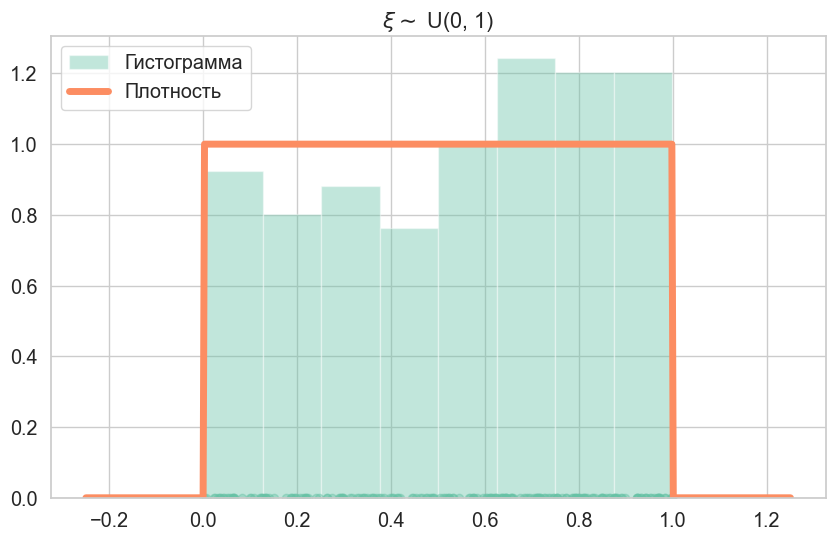

In [7]:
plot_uniform_density()
plt.show()

Рассмотрим как меняется значение случайной величины, если поменять precision

In [61]:
def plot_uniform_different_precision(size=100):
    fig, ax = plt.subplots(figsize=(15, 3))
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1).set_title('precision = {}'.format(precision))
        sample = uniform(size, precision)
        plt.scatter(sample, np.zeros(size), alpha=0.4)
        plt.yticks([])
        if i < 4:
            plt.xticks([])
        fig.suptitle('Значения случайных величин в зависимости от precision')
    plt.tight_layout()
    plt.show()

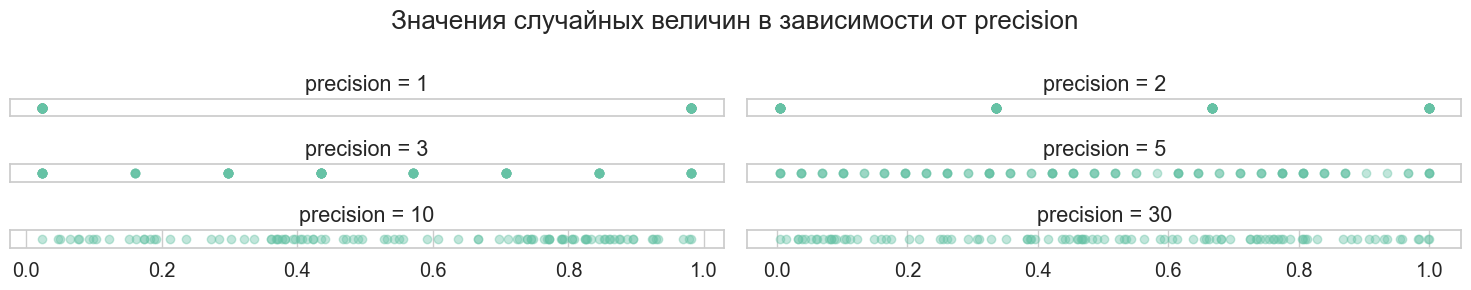

In [62]:
plot_uniform_different_precision()

##### Часть 2.
Рассмотрим функцию `normal` - генератор случайных величин из распределения N(loc,scale 2)

In [10]:
def normal(size=1, loc=0, scale=1, precision=30):
    first = uniform(size, precision)
    second = uniform(size, precision)
    return loc + np.sqrt(np.log(first) * -2) * scale * np.cos(second * 2 * np.pi)

Нарисуем для для N(0,1)

In [44]:
def plot_normal_density(size=200):
    sample = normal(size)
    grid = np.linspace(-3, 3, 600)
    plt.figure(figsize=(10, 6))
    plt.scatter(y=np.zeros(size), x=sample, alpha=0.4)
    plt.hist(sample, alpha=0.4, bins=12, density=True, label='Гистограмма случайной величины')
    plt.plot(grid, norm_pdf(grid), label='Плотность')
    plt.legend(loc=2)
    plt.title(r'$\xi\sim N(0, 1)$')

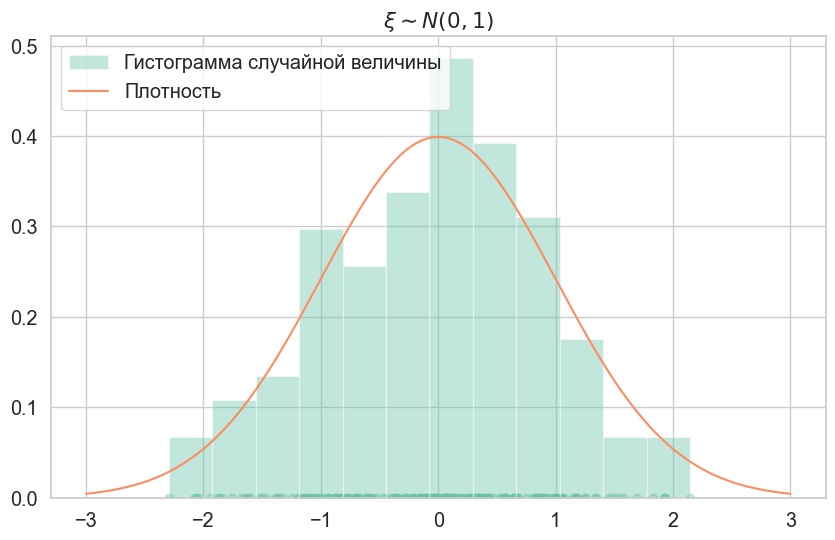

In [45]:
plot_normal_density()

##### Часть 3.
Аналогично рассмотрим экспоненциальное распределение

In [13]:
def expon(size=1, lambd=1, precision=30):
    return np.log(uniform(size=size, precision=precision)) * -1 / lambd

In [42]:
def plot_expon_density(size=100):
    grid = np.linspace(-0.5, 5, 500)
    sample = expon(lambd=1, size=size)
    plt.figure(figsize=(10, 5))
    plt.scatter(y=np.zeros(size), x=sample, alpha=0.4)
    plt.hist(sample, bins=13, alpha=0.4, density=True, label='Гистограмма')
    plt.plot(grid, expon_pdf(grid), label='Плотность', lw=3)
    plt.legend()
    plt.title(r'$\xi\sim Exp(1)$')

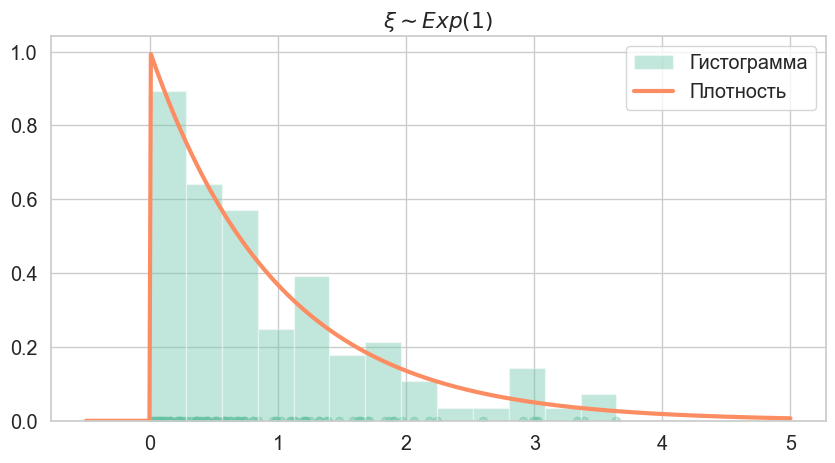

In [43]:
plot_expon_density()

**Выводы:**

В **1-ой части** эксперимента мы установили, что чем больше precision, тем больше выборка похожа на нормальное распределение.

Во **2-ой части** мы убедились в том, что выборка случайных величин, полученная преобразованием Бокса-Мюллера, соответствует нормальному распределению.

Из **3-ей части** опыта мы увидели, что метод обратного преобразования дает нам экспоненциальное распределение.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

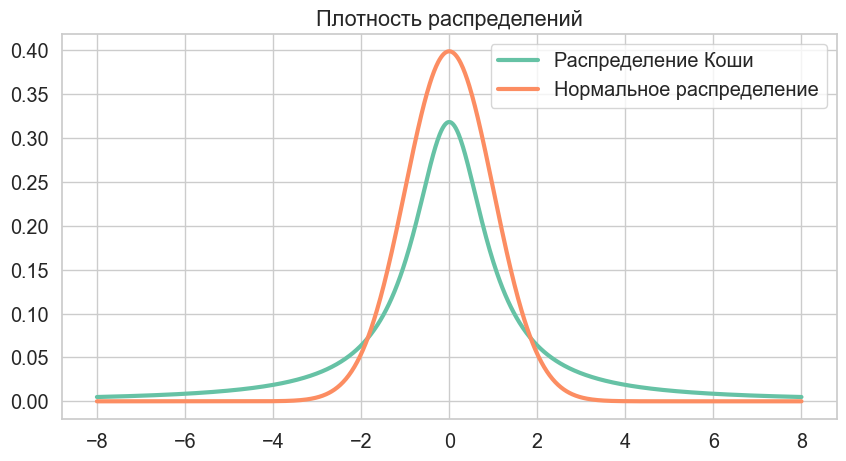

In [16]:
grid = np.linspace(-8, 8, 1000)
plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), label='Распределение Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), label='Нормальное распределение', lw=3)
plt.title('Плотность распределений')
plt.legend()

Из графика можно увидеть, что график плотности *Распределения Коши* более пологий, чем плотность *Нормального распределения*. Следовательно, оно убывает к нулю медленнее, то есть элементы выборки сильно выбрасываются в хвосты распределения. В этом проблема *Распределения Коши*, выборочное среднее не оценивает *матожидание*.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон?

In [17]:
size = 1000 # количество случайных величин
samples = sps.cauchy.rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)

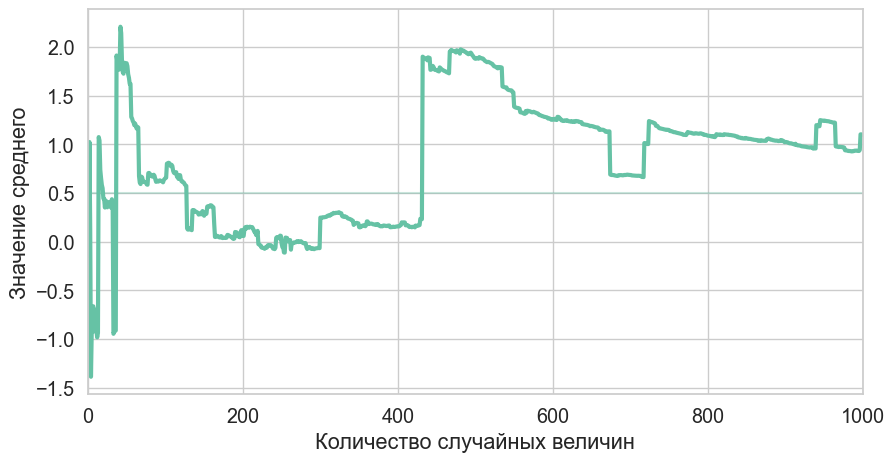

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(cum_means, lw=3)
plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Но одного эксперимента мало, чтобы понять свойства вероятностных объектов.
Повторим эксперимент 10 раз независимо.

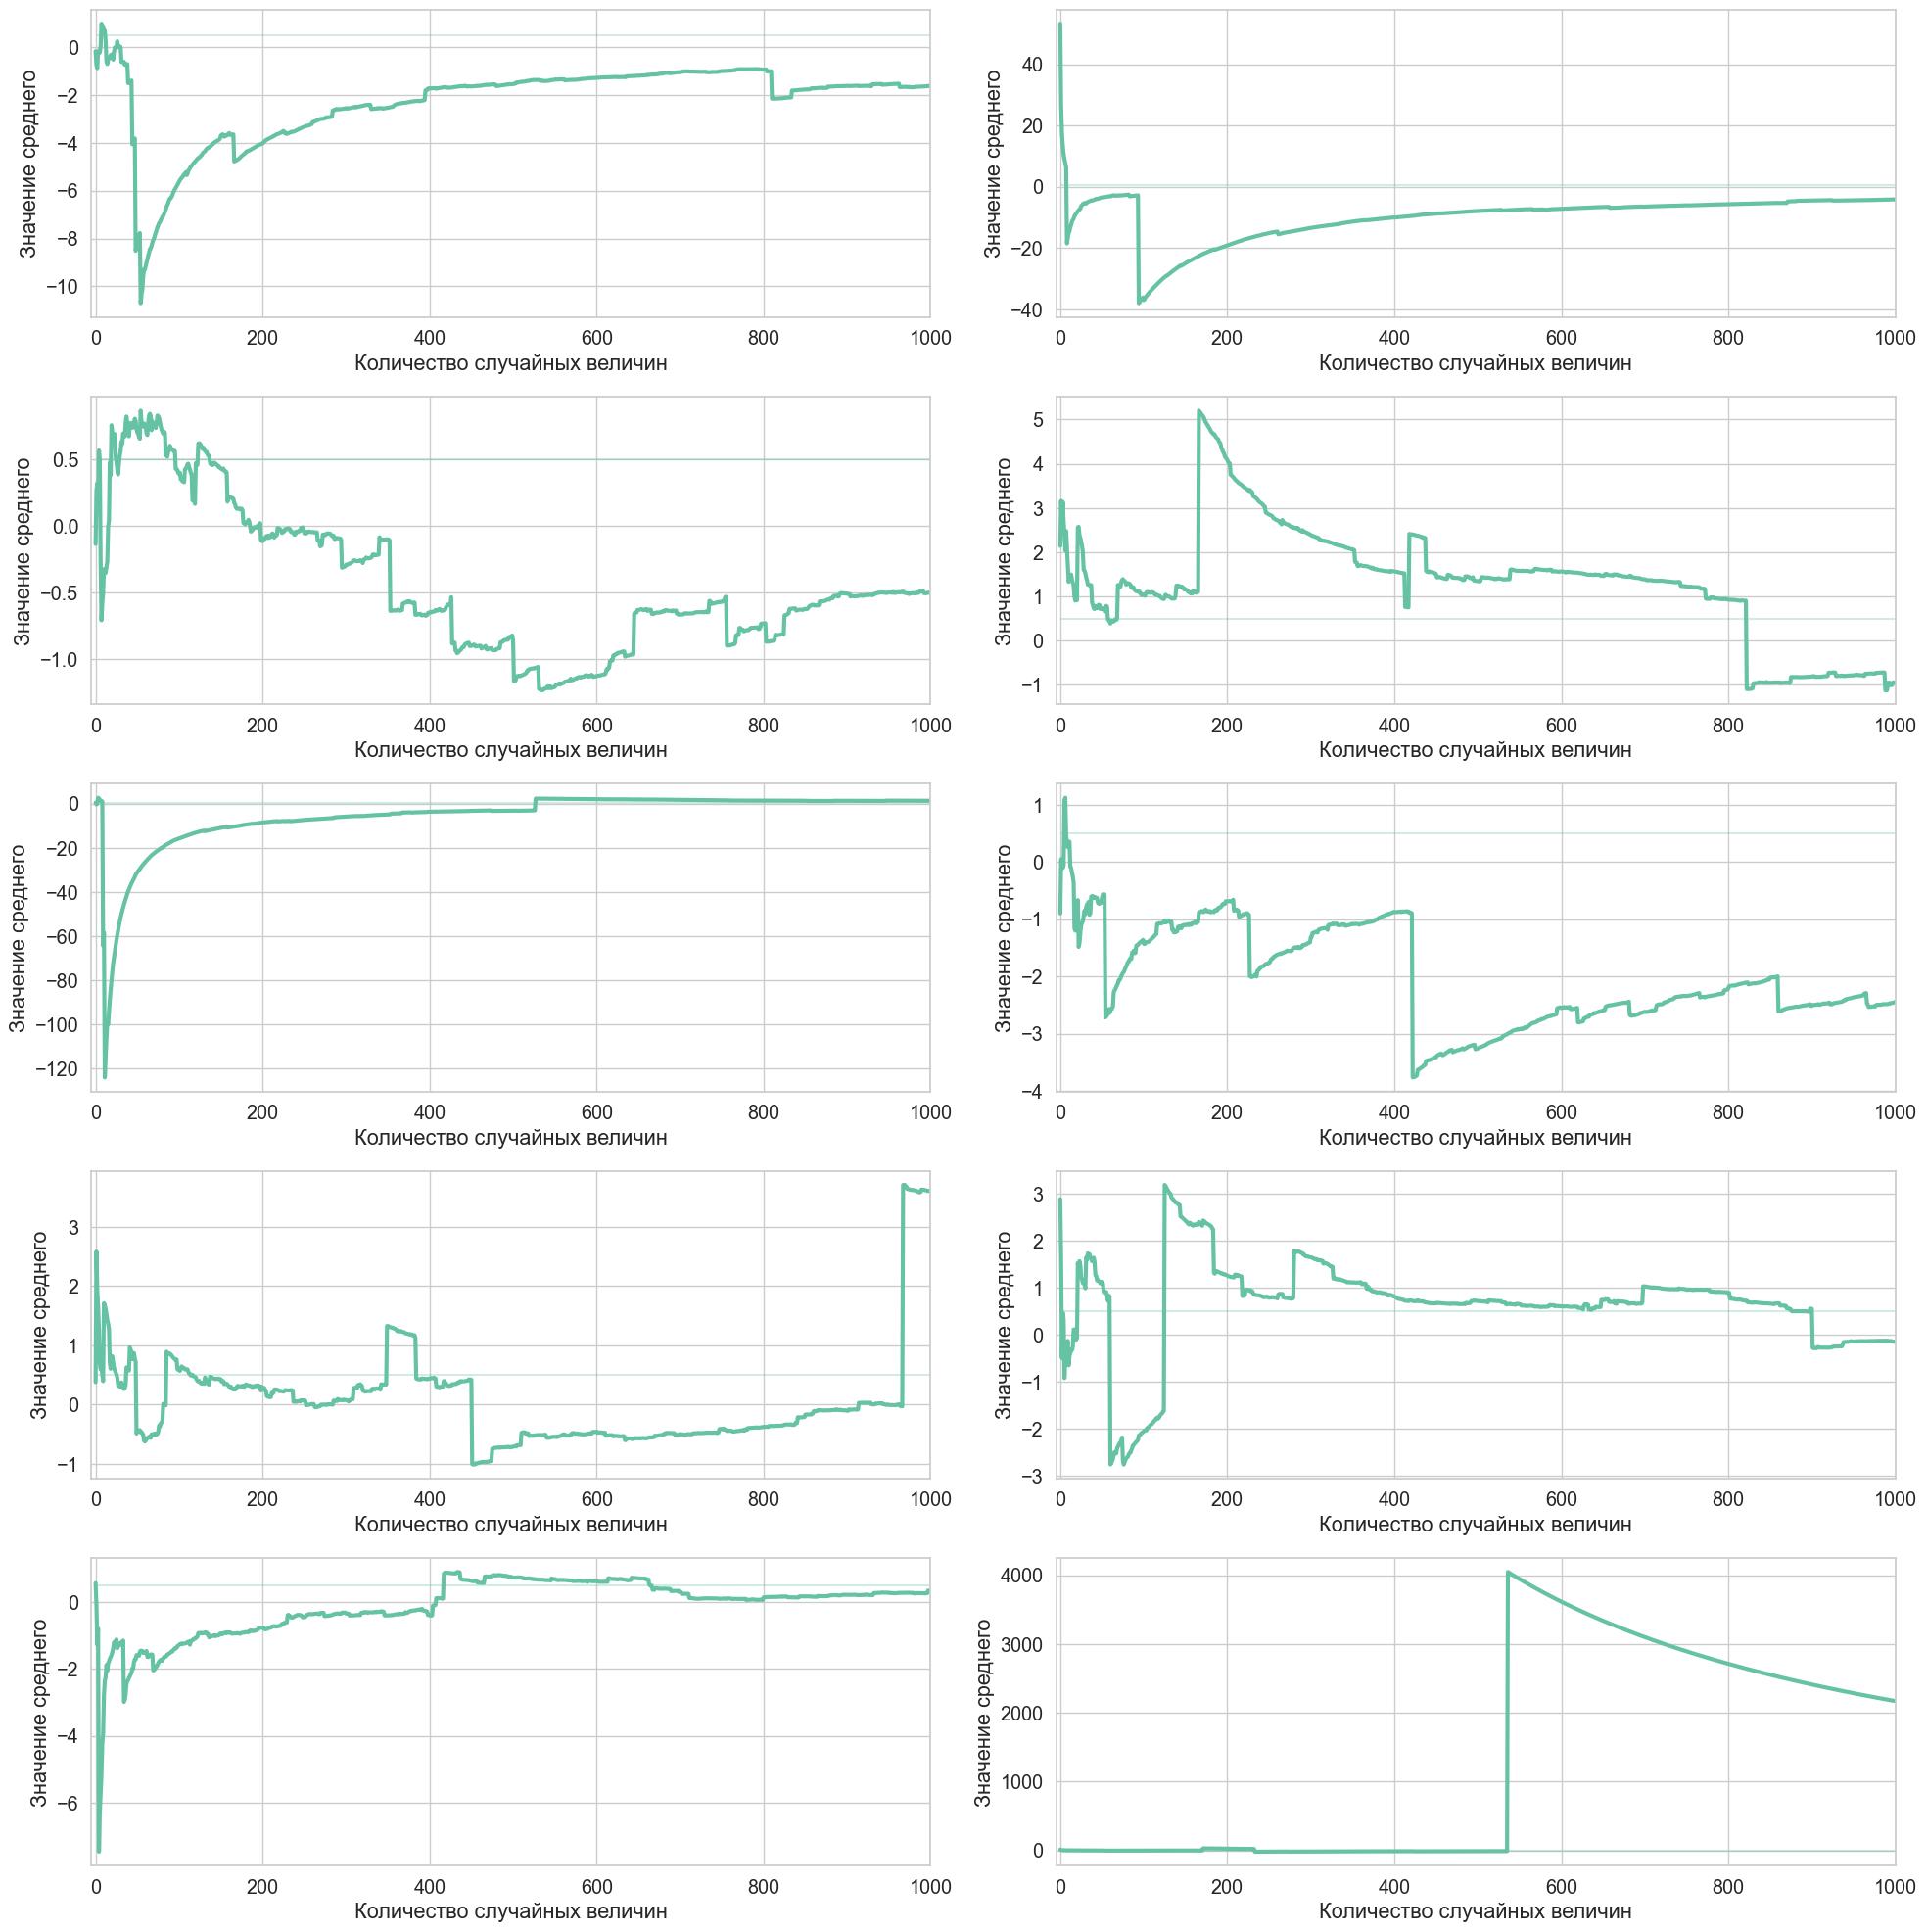

In [19]:
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)

    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))

plt.tight_layout()

Сгенерируем большое количество независимых наборов случайных величин

In [20]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

И нарисуем их всех одним цветом

(-150.0, 150.0)

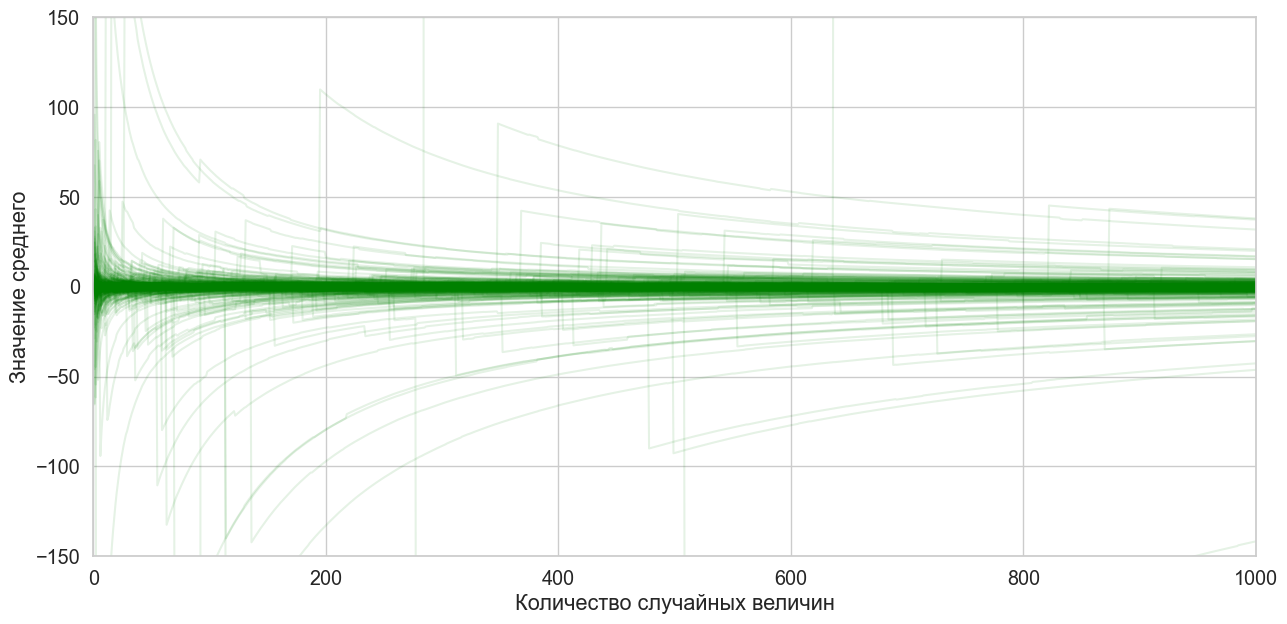

In [21]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.1)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.ylim(-150, 150)

Если бы значение среднего сходилось с ростом *количества случайных величин* к какой-либо константе, то, в силу симметрии распределения, такой константой мог быть только 0. Но 0 не является точкой сходимости.

Если посмотреть на график, то мы увидим множество *достаточно больших отклонений*, причем эти *отклонения* появляются для любого количества случайных величин, что как раз и говорит нам о том, что **Закон Больших Чисел** **не выполняется** для *распределения Коши*

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

In [22]:
size = 1000 # количество случайных величин

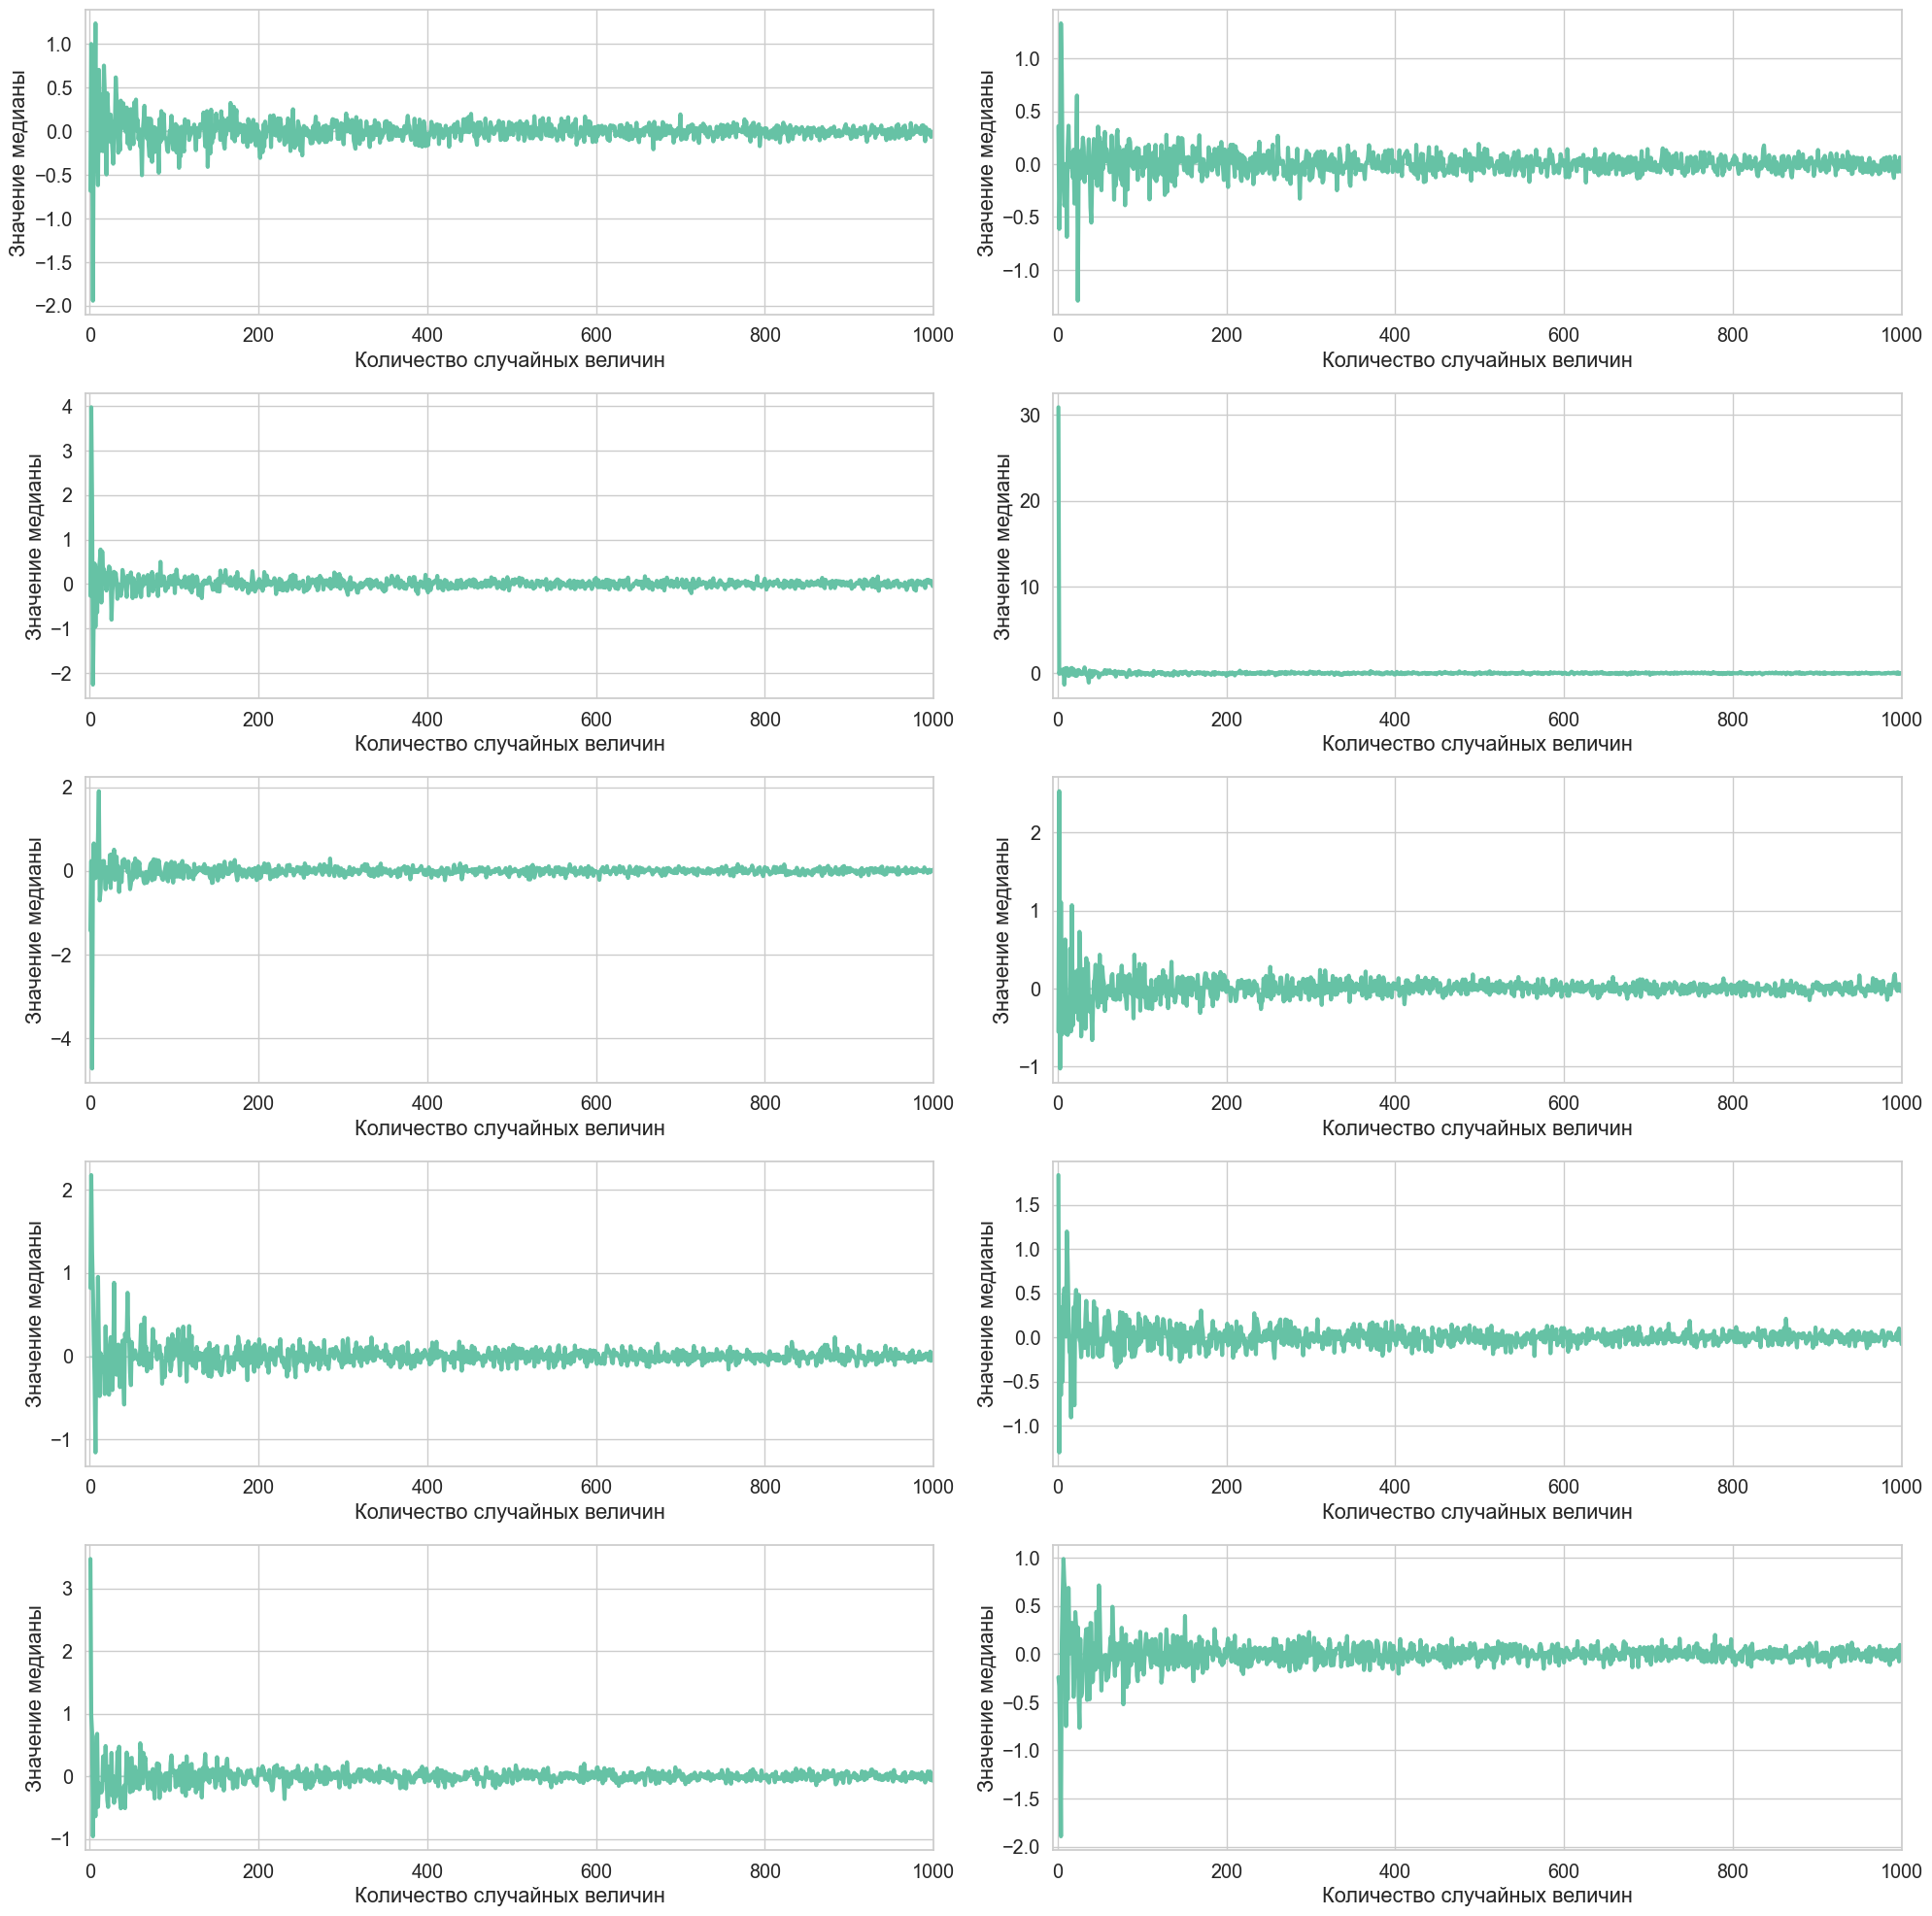

In [46]:
plt.figure(figsize=(20, 20))

for i in range(10):
    # Генерация выборки и вычисление средних
    x = range(1, 1001)
    medians = [np.median(sps.cauchy.rvs(size=size)) for size in x]
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(x, medians, lw=3)
    plt.hlines(0, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение медианы')
    plt.xlim((-5, size))

plt.tight_layout()

Сгенерируем большое количество независимых наборов случайных величин и нарисуем их всех одним цветом

In [24]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

(-2.0, 2.0)

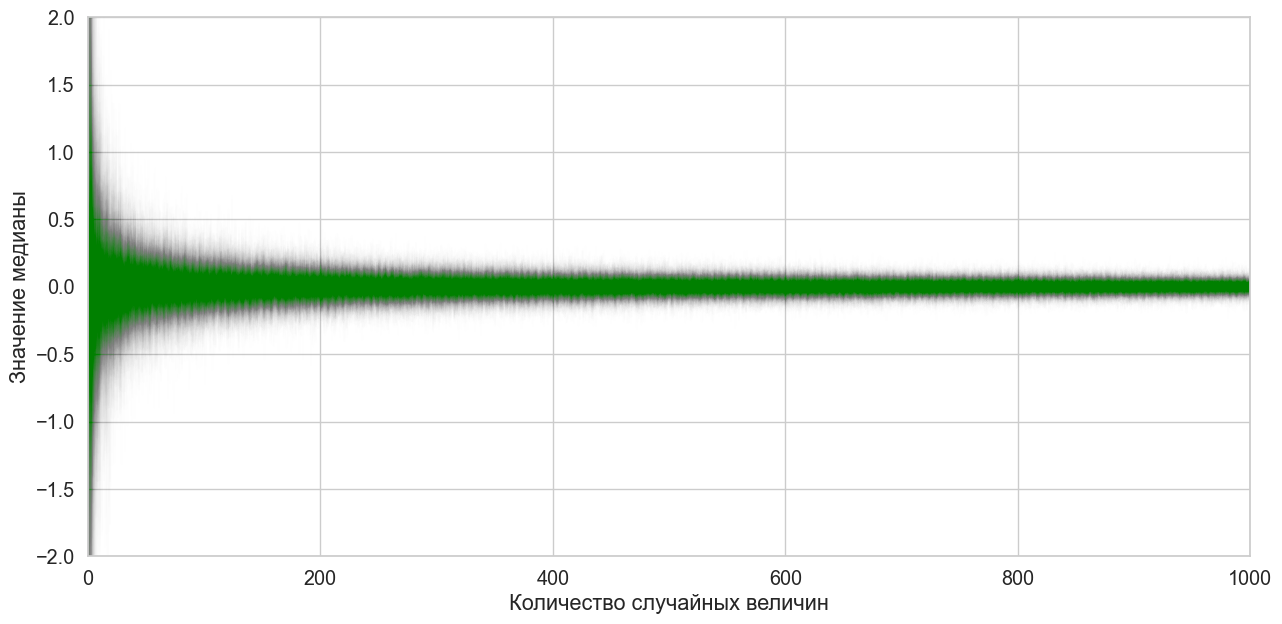

In [25]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    x = range(1, 1001)
    medians = [np.median(sps.cauchy.rvs(size=size)) for size in x]
    plt.plot(x, medians, color='green', alpha=0.003)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size))
plt.ylim(-2, 2)

**Вывод:**

Из графика видно, что значение медианы сходится к 0 и нет никаких *больших отклонений*, как это было в случае *среднего*.

Можно сделать заключение: выходом для нахождения "середины" распределения Коши по выборке является **Медиана**, потому что как я писал выше, выборочное среднее не оценивает *матожидание*, у распределения Коши его просто нет, а значит мы никак не можем найти "середину" с помощью среднего значения.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [53]:
a = 0.5
K = 500
n = 1000
e = 0.02

In [54]:
x = range(1, K + 1)
grid = range(1, n + 1)

In [55]:
samples = np.array([sps.bernoulli(a).rvs(n) for i in x])
cum_sums = samples.cumsum(axis=1) / range(1, n + 1)

In [56]:
F = np.abs(cum_sums[:, range(0, n)] - a).mean(axis=0)

Построим графики

In [0]:
plt.figure(figsize=(14, 7))

In [0]:
plt.subplot(1, 2, 2)
plt.hlines(e, 0, n, color='yellow', alpha=0.8)
plt.plot(grid, F, color='red', lw=3)
plt.xlabel('n')
plt.ylabel(r'$F(n)$')
plt.title(r'Функция $F(n)$')

Text(0.5, 1.0, 'Функция $F(n),$ Логарифмическая шкала')

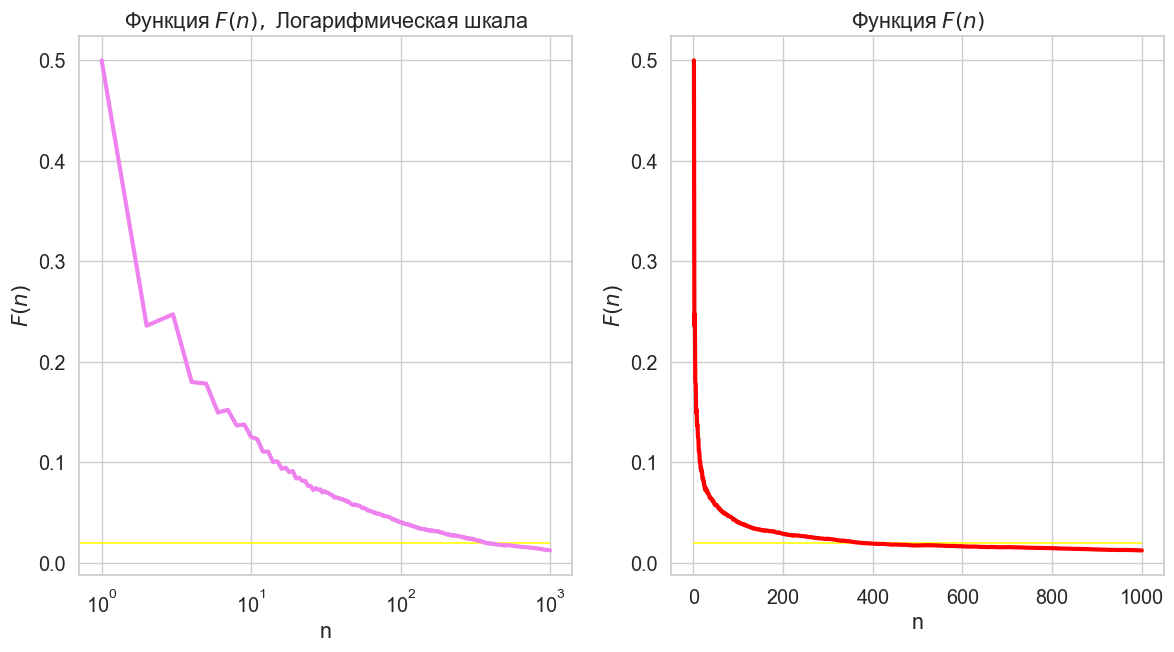

In [57]:
plt.subplot(1, 2, 1)
plt.hlines(e, 0, n, color='yellow', alpha=0.8)
plt.plot(grid, F, color='violet', lw=3)
plt.semilogx()
plt.xlabel('n')
plt.ylabel(r'$F(n)$')
plt.title(r'Функция $F(n),$ Логарифмическая шкала')

Найдем наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

In [58]:
np.where(F <= 0.02)[0][0]

372

Итого получаем значение $n = 372$ для нашей выборки, где $a = 0.5$.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

In [32]:
list_of_n = []

In [33]:
for current_a in np.arange(0.05, 1, 0.05):
    samples = np.array([sps.bernoulli(current_a).rvs(n) for i in x])
    cum_sums = samples.cumsum(axis=1) / range(1, n + 1)
    F = np.abs(cum_sums[:, range(0, n)] - current_a).mean(axis=0)
    list_of_n.append(np.where(F <= e)[0][0])

Text(0.5, 1.0, 'Зависимость $n$ от $a$')

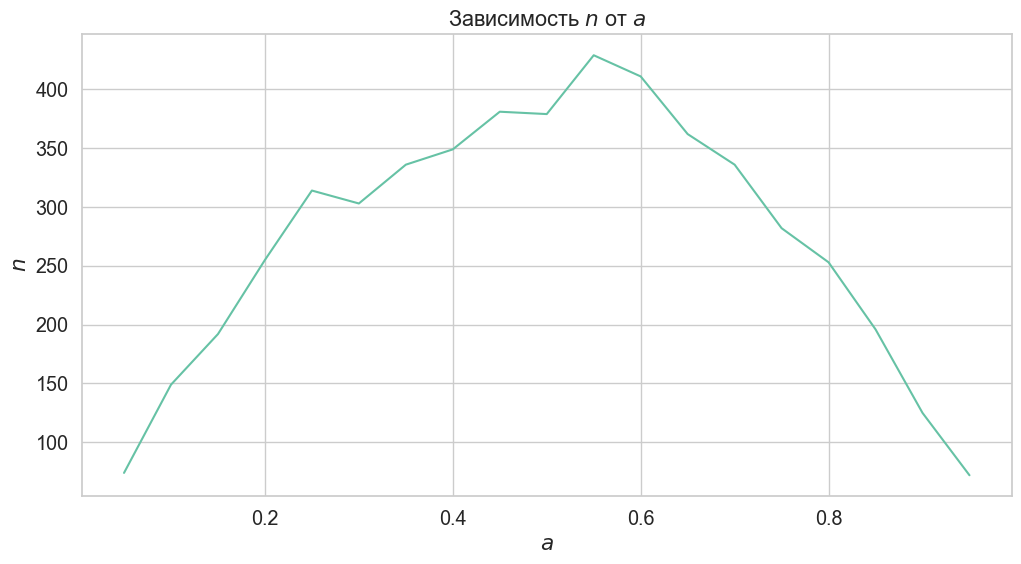

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0.05, 1, 0.05), list_of_n)
plt.xlabel(r'$a$')
plt.ylabel(r'$n$')
plt.title(r'Зависимость $n$ от $a$')

**Выводы:**

Для $a = 0.5$ получили значение $n = 372$. Наглядно показано, что чем больше нам нужна точность, тем больше $n$ нужно брать.

По результатам проделанного опыта, мы можем наблюдать интересную зависимость $n(a)$ для *распределения Бернулли* $Bern(a)$. График зависимости $n(a)$ очень похож на параболу с ветвями вниз и максимумом, примерно, в точке $a=0.5$.